## Project: PCA and tSNE
 **Marks: 30**
-----------------------------

Welcome to the project on PCA and tSNE. In this project. We will be using the auto-mpg dataset.

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [205]:
data = pd.read_csv("auto-mpg.csv")

In [206]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [208]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [209]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [210]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [211]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [212]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

#### Question 1: 
- **Check the summary statistics of the data (use describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [213]:
#Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- On an average vehicles drive 23 miles per gallon, however data represents high standard deviation with the least efficient vehicles driving approch 9 miles per gallon to circa 47 miles being the most efficient. The IQR is approx 12 miles per gallon that is interquartile spanning from 17 to 29 miles where most of the vehicles are positioned. There are outliers with high efficiency.
- The typical car has got 5 cylinders using average with smallest being 3 cylinders and higherst 8 cylinders, however most card oscilate with 4 cylinders with data being highly skewed on the left where largest cars have 8 cyllinders and lowest 3
- engine size on average is 192 with high standard deviation where minimal engine size is 68 and maximum 455. It looks that we have right skewed data with large vehicles/trucks being part of data set compared with non transportation vehicles
- cars horse power on average is 104 hp with most vehicles having circa 100horse power and the smallest number of vehicles reaching up to 230 hp beint outliers
- the average wight of wehicles is circa 3k lbs  with high standard deviation with minimum weight of circa 2.2 k lbs and max over 5.1 k lbs which again confirms we have small data set of heavy vehicles probably trucks
- on average the acceleration is approv 15 seconds from 0-60mph with small standard deviation, however for the slowest vehicles it takes approv 25 seconds to 60mph, most wehicles are in the range of circa 14 to 17 seconds. The gastest cars reach 60mph in just 8 seconds
- the vehicles are produced circa around the same tim in year 76 with small standard deviation, with most vehicles produced betwen year 73 and 79 and eldest being outliers in year 82, 

#### Let's check the distribution and outliers for each column in the data

#### Question 2:
- **Create the histogram to check distribution of all variables (use .hist() attribute) (1 Mark)**
- **Create boxplot to visualize outliers for all variables (use sns.boxplot()) (1 Mark)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


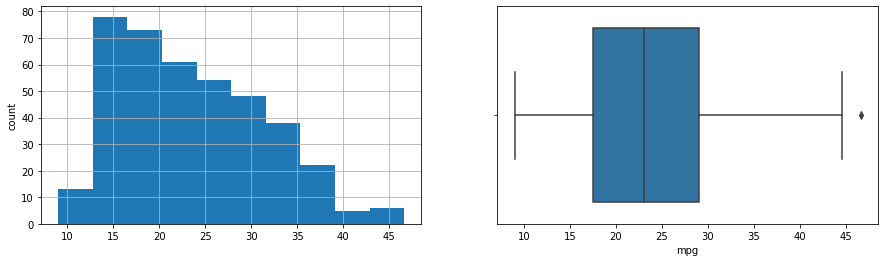

cylinders
Skew : 0.53


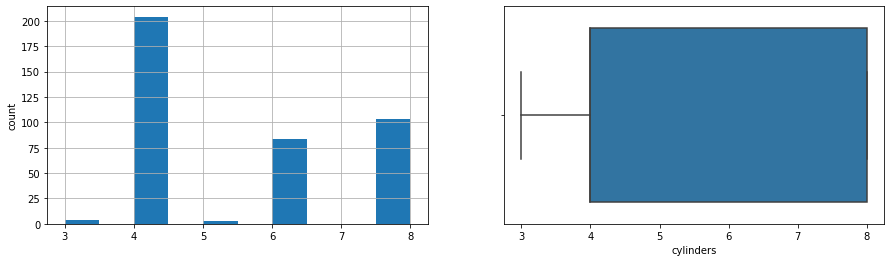

displacement
Skew : 0.72


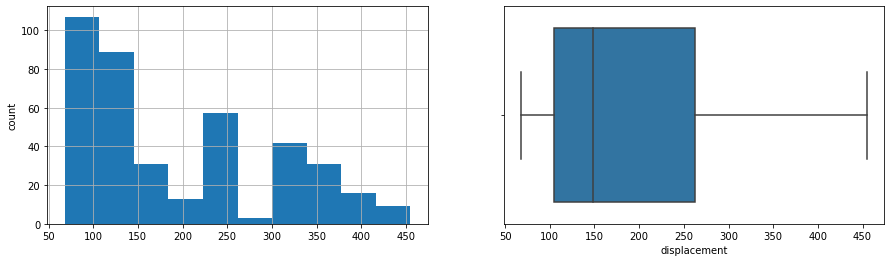

horsepower
Skew : 1.11


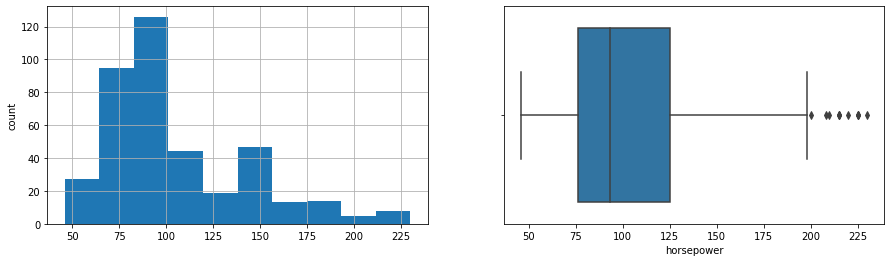

weight
Skew : 0.53


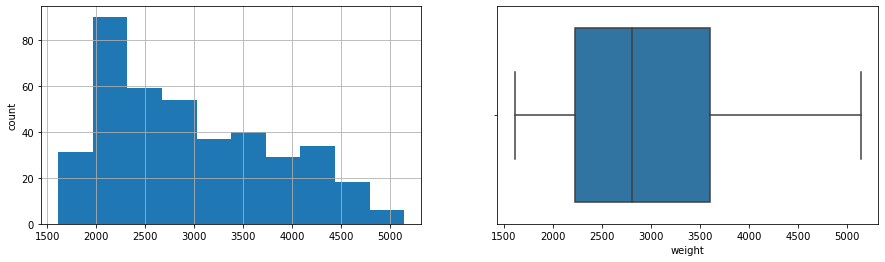

acceleration
Skew : 0.28


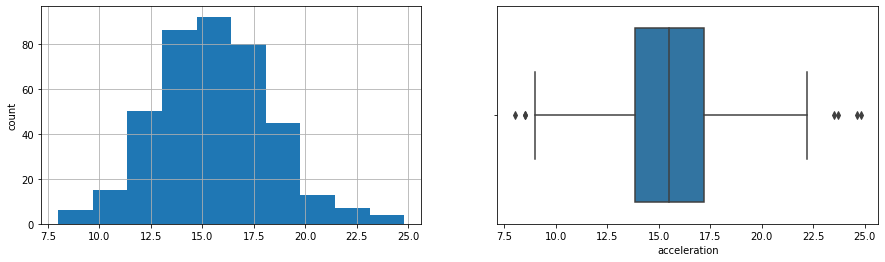

model year
Skew : 0.01


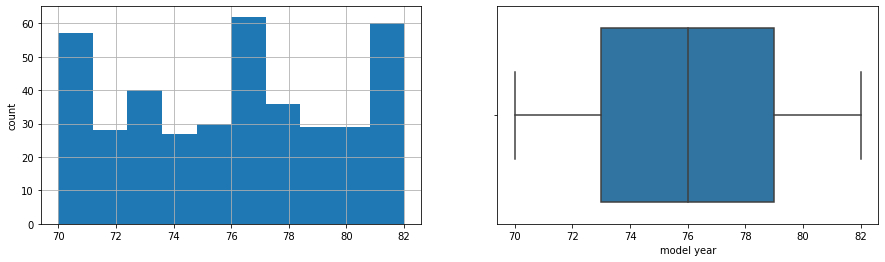

In [214]:
#Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist()
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- miles per gallon have got almost normal distribution with typical milage being between circa 18 to 28 gallons, and just few outliers with over 45 miles per gallon
- number of cylinders is right swewed with most cylinders being 4 and maximum 8, just few vehicles having 3 and 5 cylinders, over 50% of data is between 4 and 8 cyllinders
- engine size is sweded on right with most engines being between circa 100 and 250 size and median being 150. There are no outliers, but variance is high reaching 450 size
- typical horsepower is at average circa 90 hp with large deviation  and multiple outliers exceeding 200hp
- weight has pretty standard distribution being lightly skewed to the right, 75% of the data is below approv 3.5 k lbs with the heaviest vehicles being  over 5k lbs
- acceleration is normally distributed with circa 15 seconds to 60mph typically cars speed to 60mph between approx 14 and 17 seconds.There are outliers on right and left speeding below 10seconds to 60 mph and over 23 seconds
- vehicles are produced between year 70 and 82 with average bieng year 76, cars are mostly produced betwen year 73 and 79. There are no outliers
 

#### Checking correlation

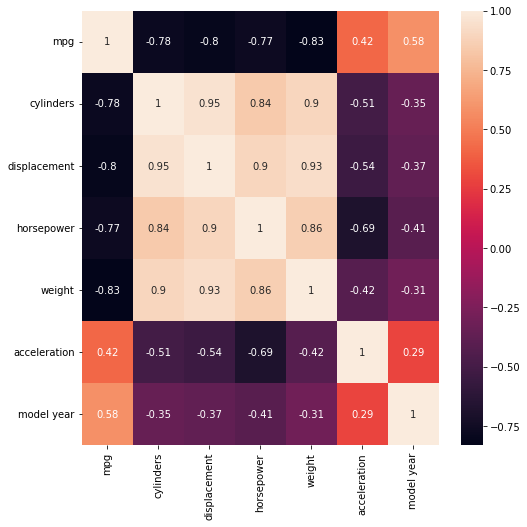

In [215]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [216]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [217]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

#### Question 3:

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1 (2 Marks)**
- **Write observations on the variance explained by components (2 Marks)**

In [218]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n,random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_



Text(0, 0.5, 'Cumulative Explained Variance')

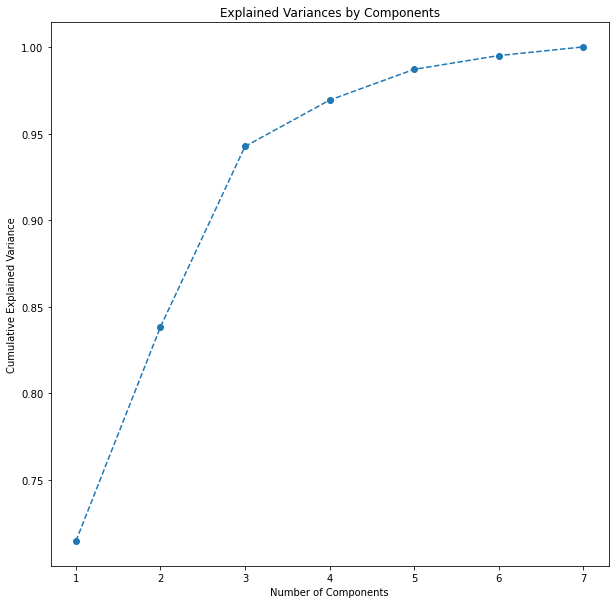

In [219]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [220]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**
- 3 attributes explain over 90% of the variance out of 7 attributes.
- With the reduction of circa 60% of variables we only lose 5 percent of variance

Let's analyse principal components

In [221]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [240]:
data_pca1[6].sum()

-1.1324274851176597e-14

In [232]:
pca.components_[:3,:]

array([[-0.39773741,  0.41648508,  0.42971252,  0.42231052,  0.41422422,
        -0.28482815, -0.22942827],
       [-0.21142965, -0.19161162, -0.17742755, -0.09032688, -0.22195569,
         0.0241102 , -0.91054785],
       [-0.25657907,  0.14078607,  0.10364893, -0.16806374,  0.2796679 ,
         0.89264543, -0.01810927]])

#### Question 4: **Interpret the coefficients of three principal components from the below dataframe (6 Marks)**

In [70]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
- The first principal component describes vehicles with high weight, howerspower, engine size and number of cylinders and low value of miles per gallon and slower acceleration. The group describes truck vehicles
- The second principal component describes old vehicles with slightly smaller number of cyllinders, weight, miles per gallon but slightly higher acceleration
- The third component describes sport vehicles with high acceleration medium size cylinders

#### We can also visualize the data in 2 dimensions using first two principal components 

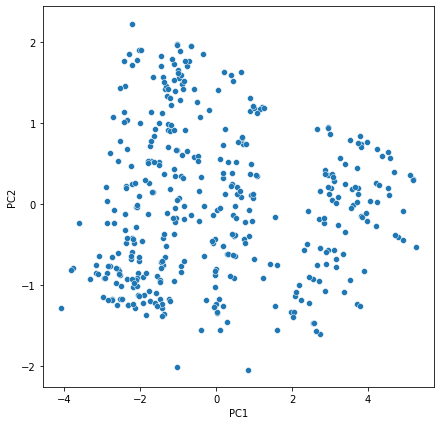

In [170]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [155]:
data_pca

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
PC2,-0.21,-0.19,-0.18,-0.09,-0.22,0.02,-0.91


**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

In [225]:
data_pca.components_

AttributeError: 'DataFrame' object has no attribute 'components_'

In [168]:
data_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983


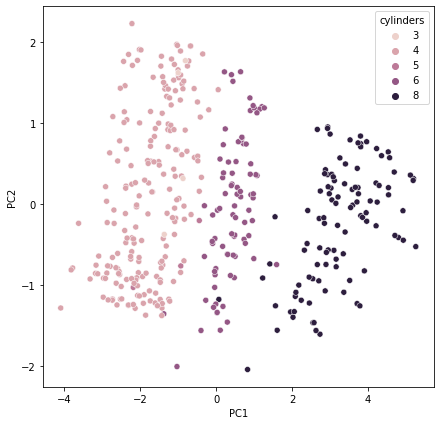

In [173]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1],hue=data['cylinders'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Observations:**
- we can see 3 groups of data. first having smaller number of cylinders between 3 and 4, second group wtih 5 and 6 cylinders and third group with 8 cylinders, the groups are not clearly divisible though 

## t-SNE

#### Question 6: 
- **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1) (2 Marks)**
- **Write your observations on the below scatter plots (2 Marks)**   

In [177]:
tsne = TSNE(n_components=2,random_state=1,perplexity=35)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data



C:\Users\micha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [178]:
data_tsne.shape

(398, 2)

In [179]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [180]:
data_tsne.head()

,Component 1,Component 2
0,6.659984,28.795218
1,8.506000,29.172798
2,7.414372,29.271976
3,7.372676,28.782196
4,7.061036,29.343134


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

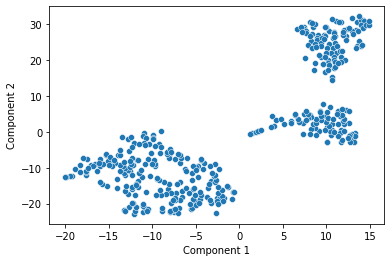

In [181]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

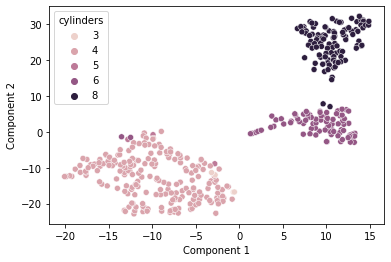

In [182]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**
- T-sne provided much clearer division of data into 3 groups with cylinders between 3 and 4, next group 5-6 and third group 8 cylinders with little noise

In [183]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [184]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

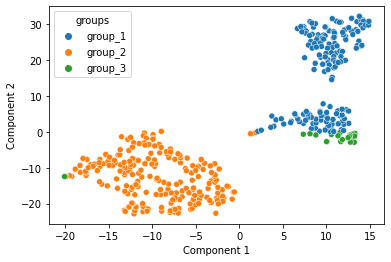

In [185]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [187]:
data['groups'] = data_tsne['groups'] 

#### Question 7: 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (4 Marks)**

In [199]:
all_col = data.columns.tolist()
all_col

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'groups']

In [200]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,groups
0,18.0,8,307.0,130.0,3504,12.0,70,group_1
1,15.0,8,350.0,165.0,3693,11.5,70,group_1
2,18.0,8,318.0,150.0,3436,11.0,70,group_1
3,16.0,8,304.0,150.0,3433,12.0,70,group_1
4,17.0,8,302.0,140.0,3449,10.5,70,group_1


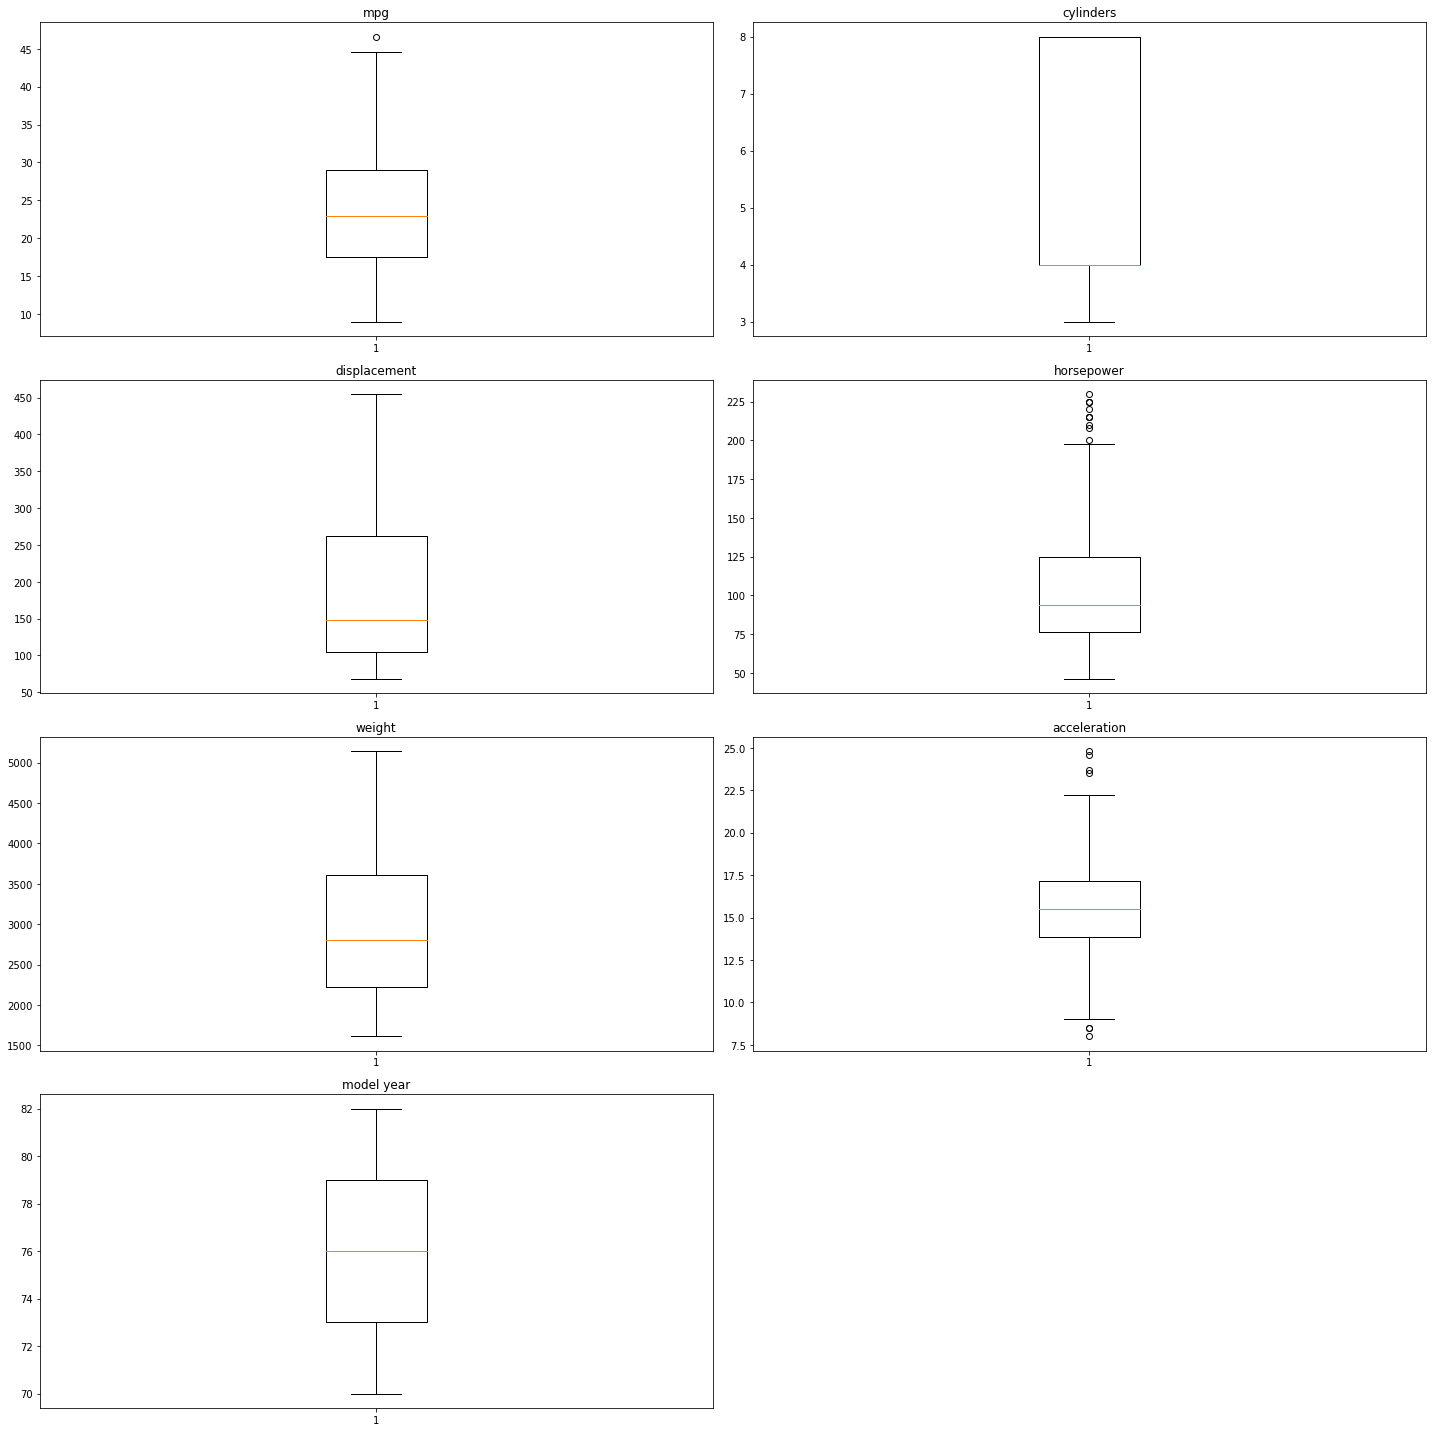

In [203]:
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    plt.boxplot(data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**

- mpg has got almost standard distribution with average milage circa 25 per gallon iwth not many outliers
- 25% of data has vehicles with lower than 4 cylinders, most of the vehicles have 4 to 8 cylinders with average being 4
- vehicels tend to weigh between approva 2.2 k lbs to 3.5k lbs with average being approvh 2.7klbs. There are also heavy vehicles with weight over 5klb but no outliers
- all vehicles tend to have acceleration at around 17 sec to 60mph with outliers on the both ends and much faster vehicles with less than 10 seconds to 60mph  and much slower with over 23 seconds to 60mph
- cars are typically produced between year 73 an 79 with 76 being average with oldest vehicles from year 70 and youngest 82, there are no outliers